In [1]:
from dojo1.models import Field

In [2]:
Field.objects.all()

<QuerySet [<Field: Field object>, <Field: Field object>, <Field: Field object>]>

In [3]:
from django.template.loader import render_to_string

In [8]:
record_list = [
    {'name': '휴대폰 수리건', 'created_at': '2018-1-1'},
    {'name': '노트북 수리건', 'created_at': '2018-1-2'},
    {'name': '냉장고 수리건', 'created_at': '2018-1-3'},
]

message = render_to_string('dojo1/sms_message.txt', {
    'name': '이진석',
    'record_list': record_list,
    'amount': 100000,
})
print(message)

안녕하세요. 이진석님.

신청하신 건들에 대한 처리가 끝났습니다. 내역은 아래와 같습니다.

- 휴대폰 수리건: 2018-1-1
- 노트북 수리건: 2018-1-2
- 냉장고 수리건: 2018-1-3

총 비용은 100000원입니다.

감사합니다.



## 지도 mapping 실습

In [6]:
import pandas as pd

In [22]:
pd.read_excel?

In [46]:
df = pd.read_excel('지도_mapping_실습.xlsx', parse_dates=['occr_date'])
df.head()

,voc_type,try_nm,sgg_nm,emd_nm,longitude,latitite,occr_date
0,HDVoice품질,강원,강릉시,장현동,128.888430,37.732395,2017-06-20
1,음성품질,강원,강릉시,구정면,128.856951,37.719397,2017-06-20
2,HDVoice품질,강원,강릉시,교동,128.899544,37.761604,2017-06-20
3,HDVoice품질,강원,강릉시,교동,128.880934,37.764728,2017-06-20
4,HDVoice품질,강원,강릉시,사천면,128.810161,37.837852,2017-06-20


In [58]:
df['addr'] = df['try_nm'] + ' ' + df['sgg_nm'] + ' ' + df['emd_nm']

/Users/nomadekr/.pyenv/versions/3.6.3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


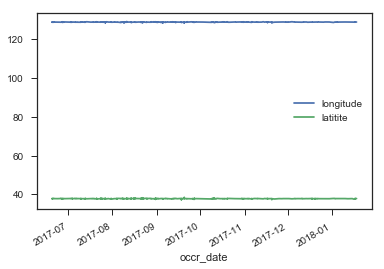

In [60]:
df.plot(x='occr_date', y=['longitude', 'latitite'])

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

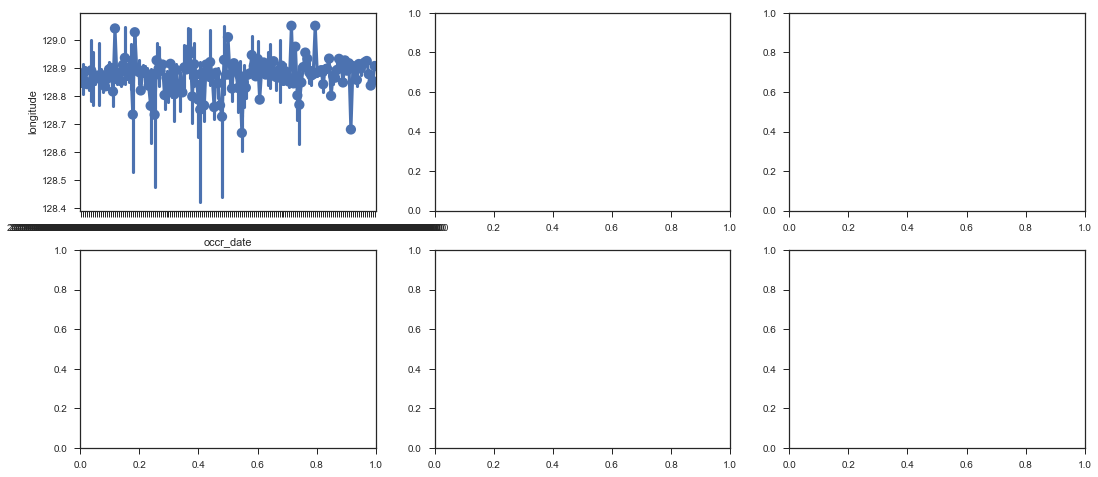

In [98]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

ret = sns.pointplot(data=df, x='occr_date', y='longitude', ax=ax1)

In [103]:
from io import BytesIO

io = BytesIO()
figure.savefig(io)
io.seek(0)

0

In [107]:
from base64 import b64encode

io.getvalue()

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\x10\x00\x00\x02@\x08\x06\x00\x00\x00\xf5\xb5J\xfd\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0b\x12\x00\x00\x0b\x12\x01\xd2\xdd~\xfc\x00\x00\x009tEXtSoftware\x00matplotlib version 2.1.1, http://matplotlib.org/\x00\xe6O\x9b\x00\x00 \x00IDATx\x9c\xec\xddytSe\xfe\x06\xf0\'{\xd3\xa6t/P\xdaBY\ne\xa7\x94\x1dA\x8b\x88\x80\x0e\x08*(\x83\xa3\xe2(\x8e\x16\xc7a~\xb8\x82\x8a\x82\xb8\x8f\x16\x15e\x06g\x04\x14PQPqa\x13d\xdf\x0bhAvZ\xb6R\xe8\xde4m\x96\xdf\x1f\xa5\xa1I\xeeMn\xb6\xa6\xcb\xf39\x87s\x9a\x9b\x9b\xf7\xbem\x93\xeb\xe9\xe3\xf7}\xbf2\x8b\xc5b\x01\x11\x11\x11\x11\x11\x11\x11\x11\x11\x91\x00y\xa0\'@DDDDDDDDD\xf5\x17\x03D"""""""""\x12\xc5\x00\x91\x88\x88\x88\x88\x88\x88\x88\x88\x88D1@$"""""""""Q\x0c\x10\x89\x88\x88\x88\x88\x88\x88\x88\x88H\x14\x03D"""""""""\x12\xc5\x00\x91\x88\x88\x88\x88\x88\x88\x88\x88\x88D1@$"""""""""Q\x0c\x10\x89\x88\x88\x88\x88\x88\x88\x88\x88H\x14\x03D"""""""""\x12\xc5\x00\x91\x88\x88\x88\x88\x

In [102]:
with open("io.png", "wb") as f:
    f.write(io.read())

## Place 모델

In [49]:
from dojo1.models import Place
from datetime import datetime

In [50]:
Place.objects.all()

<QuerySet [<Place: Place object>, <Place: Place object>, <Place: Place object>, <Place: Place object>, <Place: Place object>, <Place: Place object>, <Place: Place object>, <Place: Place object>, <Place: Place object>, <Place: Place object>, <Place: Place object>, <Place: Place object>, <Place: Place object>, <Place: Place object>, <Place: Place object>, <Place: Place object>, <Place: Place object>, <Place: Place object>, <Place: Place object>, <Place: Place object>, '...(remaining elements truncated)...']>

In [51]:
Place.objects.all().delete()

(377, {'dojo1.Place': 377})

In [52]:
for (index, row) in df.iterrows():
    place = Place()
    place.voc_type = row.voc_type
    place.try_nm = row.try_nm
    place.sgg_nm = row.sgg_nm
    place.emd_nm = row.emd_nm
    place.longitude = float(row.longitude)
    place.latitute = float(row.latitite)
    place.occr_date = row.occr_date
    place.save()

## TODO

+ 업로드
+ 템플릿 상속/문법
+ CRUD

In [31]:
from bokeh.charts import Bar, output_file, show
from bokeh.sampledata.autompg import autompg as df

p = Bar(df, label='yr', values='mpg', agg='mean',
        title="Average MPG by YR")

output_file("bar.html")

show(p)

ModuleNotFoundError: No module named 'bokeh.charts'

In [32]:
import seaborn as sns

In [33]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

In [40]:
from bokeh.charts import output_file, Chord

ModuleNotFoundError: No module named 'bokeh.charts'

In [36]:
'''
from io import BytesIO
from PIL import Image
imgdata = BytesIO()
fig.savefig(imgdata, format='png')
imgdata.seek(0)  # rewind the data
im = Image.open(imgdata)
'''
None

In [39]:
df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>dataset</th>\n      <th>x</th>\n      <th>y</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>I</td>\n      <td>10.0</td>\n      <td>8.04</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>I</td>\n      <td>8.0</td>\n      <td>6.95</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>I</td>\n      <td>13.0</td>\n      <td>7.58</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>I</td>\n      <td>9.0</td>\n      <td>8.81</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>I</td>\n      <td>11.0</td>\n      <td>8.33</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>I</td>\n      <td>14.0</td>\n      <td>9.96</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>I</td>\n      <td>6.0</td>\n      <td>7.24</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>I</td>\n      <td>4.0</td>\n      <td>4.26</td>\n    </tr>\n    <tr>\n    